# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
import seaborn as sns

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [4]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [5]:
seed = 42
##Train and Test before balancing test database
Y = df.Label
X = df.drop(['Label'], axis=1)
print("Y sample: ", Y.shape)
print("X sample: ", X.shape)

Y sample:  (138721,)
X sample:  (138721, 15)


In [6]:
#Train the model selecting the best found parameters
from sklearn.model_selection import train_test_split
size = 0.30
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=size, random_state=seed).copy()
print ("Rows train: ", len(Y_train))
print ("Sum_Label train: ", sum(Y_train))

Rows train:  97104
Sum_Label train:  552


### DecisionTreeClassifier before balancing test database

In [7]:
#Train DecisionTreeClassifier and metrics
regTree = DecisionTreeClassifier()
regTree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
Y_pred = regTree.predict(X_validation)
print ("accuracy_score: ",accuracy_score(Y_validation, Y_pred))
print ("f1_score: ",f1_score(Y_validation, Y_pred))
print ("fbeta_score: ",fbeta_score(Y_validation, Y_pred, beta=10))

accuracy_score:  0.9888987673306582
f1_score:  0.1380597014925373
fbeta_score:  0.15074018797144126


### LogisticRegression before balancing test database

In [9]:
#Train LogisticRegression and metrics
logreg = LogisticRegression(solver='liblinear', max_iter=200)
logreg.fit(X_train, Y_train)

C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
Y_pred = logreg.predict(X_validation)
print ("accuracy_score: ",accuracy_score(Y_validation, Y_pred))
print ("f1_score: ",f1_score(Y_validation, Y_pred))
print ("fbeta_score: ",fbeta_score(Y_validation, Y_pred, beta=10))

accuracy_score:  0.994112982675349
f1_score:  0.0
fbeta_score:  0.0


C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [11]:
print ("Total rows in train dataset: ", len(Y_train))
print ("Sum frauds in train dataset: ", sum(Y_train))
non_fraud_indices = Y_train[Y_train == 0].index
print ("Sum non in frauds train: ", len(non_fraud_indices))

Total rows in train dataset:  97104
Sum frauds in train dataset:  552
Sum non in frauds train:  96552


In [12]:
def GetInidicesUnderSampling(Y_train, target_percentage=0.5, seed=42):
    n_samples_0_new = int(sum(Y_train) / target_percentage - sum(Y_train))
    np.random.seed(seed)
    random_indices = np.random.choice(non_fraud_indices, n_samples_0_new, replace=False)#, random_state=seed)
    #print("count under-sampled non fraud indices:", len(random_indices))

    #Find the indices of fraud samples
    fraud_indices = Y_train[Y_train== 1].index
    #print("count total fraud indices:", len(fraud_indices))

    #Concat fraud indices with sample non-fraud ones
    indices_train = np.concatenate([fraud_indices,random_indices])
    #print("total indices to train: ", len(indices_train))

    #print("indices array: ", indices_train)
    
    return indices_train

In [13]:
def UnderSampling(X, y, target_percentage=0.5, seed=42):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

# Test balanced model
### DecisionTreeClassifier  under-sampling 

In [14]:
#Train DecisionTreeClassifier and metrics
regTree = DecisionTreeClassifier()
eval_DTC = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    #indices_for_train = GetInidicesUnderSampling(Y_train, target_percentage)
    X_under_sample, Y_under_sample = UnderSampling(X_train, Y_train, target_percentage)
    regTree.fit(X_under_sample, Y_under_sample)
    Y_pred = regTree.predict(X_validation)
    eval_DTC.append([len(Y_under_sample),
                 target_percentage,
                 accuracy_score(Y_validation, Y_pred), 
                 f1_score(Y_validation, Y_pred), 
                 fbeta_score(Y_validation, Y_pred, beta=10)])

eval_DTC = pd.DataFrame(eval_DTC, columns=['number_records','target_percentage', 'Accuracy', 'F1 Score', 'FBeta Score'])
eval_DTC

,number_records,target_percentage,Accuracy,F1 Score,FBeta Score
0,5409,0.1,0.917390,0.053414,0.351311
1,2700,0.2,0.847322,0.034347,0.370131
2,1826,0.3,0.795204,0.034877,0.470108
3,1358,0.4,0.743422,0.026973,0.424310
4,1072,0.5,0.633275,0.022919,0.453392
5,908,0.6,0.588221,0.020463,0.433030
6,778,0.7,0.482495,0.017607,0.422127
7,686,0.8,0.425739,0.016381,0.413969
8,616,0.9,0.253502,0.014215,0.405666


### LogisticRegression  under-sampling

In [15]:
#Train DecisionTreeClassifier and metrics
logreg = LogisticRegression(solver='liblinear', max_iter=200)
eval_logreg = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    #indices_for_train = GetInidicesUnderSampling(Y_train, target_percentage)
    X_under_sample, Y_under_sample = UnderSampling(X_train, Y_train, target_percentage)
    logreg.fit(X_under_sample, Y_under_sample)
    Y_pred = logreg.predict(X_validation)
    eval_logreg.append([len(Y_under_sample),
                 target_percentage,
                 accuracy_score(Y_validation, Y_pred), 
                 f1_score(Y_validation, Y_pred), 
                 fbeta_score(Y_validation, Y_pred, beta=10)])

eval_logreg = pd.DataFrame(eval_logreg, columns=['number_records','target_percentage', 'Accuracy', 'F1 Score', 'FBeta Score'])
eval_logreg

,number_records,target_percentage,Accuracy,F1 Score,FBeta Score
0,5409,0.1,0.991109,0.010695,0.008202
1,2700,0.2,0.970084,0.053232,0.138248
2,1826,0.3,0.932191,0.040789,0.222819
3,1358,0.4,0.870125,0.034304,0.324802
4,1072,0.5,0.583584,0.019020,0.404761
5,908,0.6,0.393349,0.016517,0.428875
6,778,0.7,0.267126,0.015240,0.431600
7,686,0.8,0.175962,0.013690,0.407251
8,616,0.9,0.067208,0.012465,0.389287


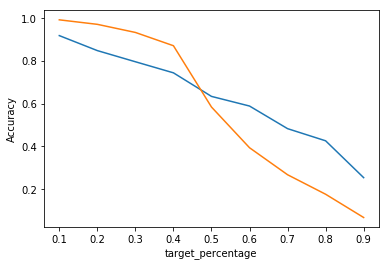

In [16]:
sns.lineplot(x="target_percentage", y="Accuracy", data=eval_DTC)
sns.lineplot(x="target_percentage", y="Accuracy", data=eval_logreg)

In [17]:
sns.lineplot(x="un ", y="F1 Score", data=eval_DTC)
sns.lineplot(x="target_percentage", y="F1 Score", data=eval_logreg)

ValueError: Could not interpret input 'un '

In [ ]:
sns.lineplot(x="target_percentage", y="FBeta Score", data=eval_DTC)
sns.lineplot(x="target_percentage", y="FBeta Score", data=eval_logreg)

Se selecciona un target_percentage del 50% dado que es el punto donde se puede observar que el FBeta Score y el F1 Score adquieren un comportamiento estable, aunque el accuracy sigue decendiento a mayor target_percentage esto se debe a que la base de datos de test tiene e su mayoría resultados negativos.

El error en el accuracy se debe principalmente a que el modelo está generando falso fraudes positivos como se puede ver en la siguiente tabla de confusión 

In [ ]:
X_under_sample, Y_under_sample = UnderSampling(X_train, Y_train, 0.5)
logreg.fit(X_under_sample, Y_under_sample)
Y_pred = logreg.predict(X_validation)
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_validation, Y_pred)

# Exercise 15.3

Same analysis using random-over-sampling

In [408]:
filter_ = np.random.choice(X_train[Y_train == 1].index, 10)
filter_
#X_train.iloc[[8626]]
X_train.loc[filter_]
#np.nonzero(Y_train == 1)[0][filter_]
X_train[Y_train == 1]
Y_train[137504]

1

In [416]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=42):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].index, int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    #filter_ = np.nonzero(y == 1)[0][filter_]
    #filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    filter_ = indices_train = np.concatenate([filter_,X[y == 0].index])    
    return X.loc[filter_], y[filter_]

### DecisionTreeClassifier random-over-sampling

In [419]:
#Train DecisionTreeClassifier and metrics
regTree = DecisionTreeClassifier()
eval_DTC = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    #indices_for_train = GetInidicesUnderSampling(Y_train, target_percentage)
    X_over_sample, Y_over_sample = OverSampling(X_train, Y_train, target_percentage)
    regTree.fit(X_over_sample, Y_over_sample)
    Y_pred = regTree.predict(X_validation)
    eval_DTC.append([len(Y_over_sample),
                 target_percentage,
                 accuracy_score(Y_validation, Y_pred), 
                 f1_score(Y_validation, Y_pred), 
                 fbeta_score(Y_validation, Y_pred, beta=10)])

eval_DTC = pd.DataFrame(eval_DTC, columns=['number_records','target_percentage', 'Accuracy', 'F1 Score', 'FBeta Score'])
eval_DTC

,number_records,target_percentage,Accuracy,F1 Score,FBeta Score
0,107280,0.1,0.988634,0.119181,0.130365
1,120690,0.2,0.990316,0.140725,0.134808
2,137931,0.3,0.989956,0.129167,0.126582
3,160920,0.4,0.989788,0.127310,0.126546
4,193104,0.5,0.989836,0.127835,0.126556
5,241379,0.6,0.990437,0.127193,0.118530
6,321839,0.7,0.990797,0.139326,0.126761
7,482760,0.8,0.990509,0.128035,0.118545
8,965520,0.9,0.990124,0.127389,0.122543


### LogisticRegression random-over-sampling

In [425]:
#Train DecisionTreeClassifier and metrics
logreg = LogisticRegression(solver='liblinear')
eval_logreg = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    #indices_for_train = GetInidicesUnderSampling(Y_train, target_percentage)
    X_over_sample, Y_over_sample = OverSampling(X_train, Y_train, target_percentage)
    logreg.fit(X_over_sample, Y_over_sample)
    Y_pred = logreg.predict(X_validation)
    eval_logreg.append([len(Y_over_sample),
                 target_percentage,
                 accuracy_score(Y_validation, Y_pred), 
                 f1_score(Y_validation, Y_pred), 
                 fbeta_score(Y_validation, Y_pred, beta=10)])

eval_logreg = pd.DataFrame(eval_logreg, columns=['number_records','target_percentage', 'Accuracy', 'F1 Score', 'FBeta Score'])
eval_logreg

C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,number_records,target_percentage,Accuracy,F1 Score,FBeta Score
0,107280,0.1,0.990821,0.000000,0.000000
1,120690,0.2,0.991037,0.005333,0.004101
2,137931,0.3,0.947161,0.043497,0.190179
3,160920,0.4,0.901627,0.037612,0.283419
4,193104,0.5,0.576447,0.019687,0.423265
5,241379,0.6,0.376553,0.017048,0.448658
6,321839,0.7,0.253238,0.014960,0.427130
7,482760,0.8,0.111589,0.012869,0.394442
8,965520,0.9,0.015571,0.011819,0.376556


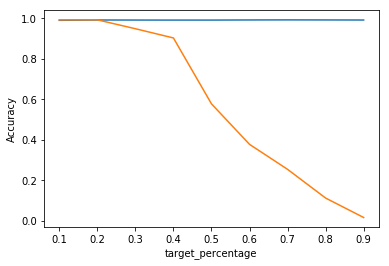

In [426]:
sns.lineplot(x="target_percentage", y="Accuracy", data=eval_DTC)
sns.lineplot(x="target_percentage", y="Accuracy", data=eval_logreg)

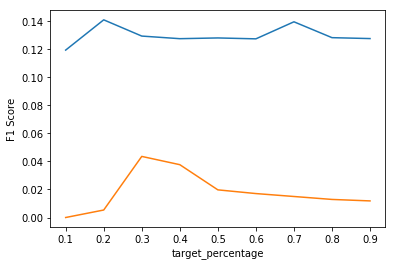

In [427]:
sns.lineplot(x="target_percentage", y="F1 Score", data=eval_DTC)
sns.lineplot(x="target_percentage", y="F1 Score", data=eval_logreg)

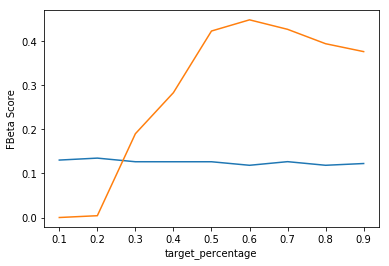

In [428]:
sns.lineplot(x="target_percentage", y="FBeta Score", data=eval_DTC)
sns.lineplot(x="target_percentage", y="FBeta Score", data=eval_logreg)

Se observa que el arbol de decisión se ve poco afectado por el over sampling dado que sus medidas de error se mantienen constantes, por el contrario la regresión logística tiene una alta variación en el accuracy, con un F1 y FBeta Score que se estabilizan desde el 50%.

Por lo cual el balance para cada uno de los modelos debería ser:

- DecisionTreeClassifier: 20%
- LogisticRegression: 50%


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [495]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE(random_state=42,  k_neighbors=5, sampling_strategy="auto").fit_resample(X_train, Y_train)
print('Original dataset shape %s' % Counter(Y_train))
print('Resampled dataset shape auto %s' % Counter(Y_smote))

Original dataset shape Counter({0: 96552, 1: 552})
Resampled dataset shape auto Counter({0: 96552, 1: 96552})


### DecisionTreeClassifier SMOTE

In [498]:
#Train DecisionTreeClassifier and metrics
regTree = DecisionTreeClassifier()
eval_DTC = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    X_smote, Y_smote = SMOTE(random_state=42,  k_neighbors=5, sampling_strategy=target_percentage).fit_resample(X_train, Y_train)
    regTree.fit(X_smote, Y_smote)
    Y_pred = regTree.predict(X_validation)
    eval_DTC.append([len(Y_smote),
                 target_percentage,
                 accuracy_score(Y_validation, Y_pred), 
                 f1_score(Y_validation, Y_pred), 
                 fbeta_score(Y_validation, Y_pred, beta=10)])

eval_DTC = pd.DataFrame(eval_DTC, columns=['number_records','target_percentage', 'Accuracy', 'F1 Score', 'FBeta Score'])
eval_DTC

,number_records,target_percentage,Accuracy,F1 Score,FBeta Score
0,106207,0.1,0.985367,0.121212,0.170034
1,115862,0.2,0.984502,0.107884,0.157699
2,125517,0.3,0.985222,0.107402,0.149816
3,135172,0.4,0.984862,0.105114,0.149726
4,144828,0.5,0.984622,0.088319,0.125456
5,154483,0.6,0.984189,0.101093,0.149558
6,164138,0.7,0.985751,0.124077,0.170143
7,173793,0.8,0.983757,0.096257,0.145423
8,183448,0.9,0.984141,0.098361,0.145516
9,193104,1.0,0.983661,0.086022,0.129285


### LogisticRegression SMOTE

In [499]:
#Train DecisionTreeClassifier and metrics
logreg = LogisticRegression(solver='liblinear')
eval_logreg = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    X_smote, Y_smote = SMOTE(random_state=42,  k_neighbors=5, sampling_strategy=target_percentage).fit_resample(X_train, Y_train)
    logreg.fit(X_smote, Y_smote)
    Y_pred = logreg.predict(X_validation)
    eval_logreg.append([len(Y_smote),
                 target_percentage,
                 accuracy_score(Y_validation, Y_pred), 
                 f1_score(Y_validation, Y_pred), 
                 fbeta_score(Y_validation, Y_pred, beta=10)])

eval_logreg = pd.DataFrame(eval_logreg, columns=['number_records','target_percentage', 'Accuracy', 'F1 Score', 'FBeta Score'])
eval_logreg

C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,number_records,target_percentage,Accuracy,F1 Score,FBeta Score
0,106207,0.1,0.994113,0.000000,0.000000
1,115862,0.2,0.993945,0.000000,0.000000
2,125517,0.3,0.972944,0.047377,0.111177
3,135172,0.4,0.945647,0.040712,0.182167
4,144828,0.5,0.935723,0.042248,0.220312
5,154483,0.6,0.899104,0.035821,0.275358
6,164138,0.7,0.863325,0.031005,0.305095
7,173793,0.8,0.794339,0.027055,0.363639
8,183448,0.9,0.681669,0.021566,0.390157
9,193104,1.0,0.601653,0.020213,0.419454


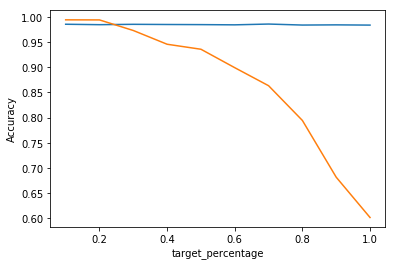

In [500]:
sns.lineplot(x="target_percentage", y="Accuracy", data=eval_DTC)
sns.lineplot(x="target_percentage", y="Accuracy", data=eval_logreg)

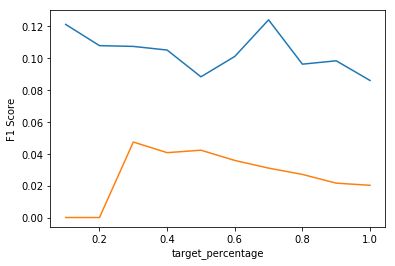

In [501]:
sns.lineplot(x="target_percentage", y="F1 Score", data=eval_DTC)
sns.lineplot(x="target_percentage", y="F1 Score", data=eval_logreg)

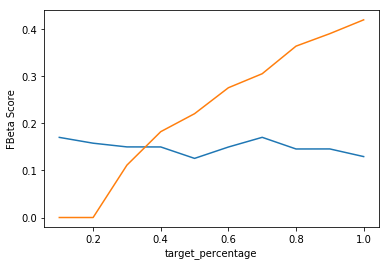

In [502]:
sns.lineplot(x="target_percentage", y="FBeta Score", data=eval_DTC)
sns.lineplot(x="target_percentage", y="FBeta Score", data=eval_logreg)

Se observa que el arbol de decisión se ve poco afectado por el over sampling dado que sus medidas de error se mantienen casi constantes, por el contrario la regresión logística tiene una alta variación en el accuracy y el FBeta Score, con un F1 Score que se estabiliza desde el 50%, aunque conserva una pequeña caida despues del 50%.

Por lo cual el balance para cada uno de los modelos debería ser:

- DecisionTreeClassifier: 20%
- LogisticRegression: 50%


# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [506]:
#import library and sample the train dataset
from collections import Counter
from imblearn.over_sampling import ADASYN 
X_ada, y_ada = ADASYN(random_state=42, sampling_strategy=0.5).fit_resample(X_train, Y_train)
print('Resampled dataset shape %s' % Counter(Y_train))
print('Resampled dataset shape %s' % Counter(y_ada))

Resampled dataset shape Counter({0: 96552, 1: 552})
Resampled dataset shape Counter({0: 96552, 1: 48187})


### DecisionTreeClassifier ADASYN

In [508]:
#Train DecisionTreeClassifier and metrics
regTree = DecisionTreeClassifier()
eval_DTC = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    X_ada, y_ada = ADASYN(random_state=42, sampling_strategy=target_percentage).fit_resample(X_train, Y_train)
    regTree.fit(X_ada, y_ada)
    Y_pred = regTree.predict(X_validation)
    eval_DTC.append([len(y_ada),
                 target_percentage,
                 accuracy_score(Y_validation, Y_pred), 
                 f1_score(Y_validation, Y_pred), 
                 fbeta_score(Y_validation, Y_pred, beta=10)])

eval_DTC = pd.DataFrame(eval_DTC, columns=['number_records','target_percentage', 'Accuracy', 'F1 Score', 'FBeta Score'])
eval_DTC

,number_records,target_percentage,Accuracy,F1 Score,FBeta Score
0,106206,0.1,0.985102,0.104046,0.145749
1,115865,0.2,0.984910,0.107955,0.153772
2,125487,0.3,0.985391,0.100592,0.137740
3,135099,0.4,0.984189,0.083565,0.121331
4,144739,0.5,0.984574,0.115702,0.169809
5,154394,0.6,0.984429,0.109890,0.161710
6,163992,0.7,0.983877,0.101740,0.153508
7,173632,0.8,0.983829,0.071724,0.105124
8,183226,0.9,0.983757,0.076503,0.113179
9,192927,1.0,0.983877,0.087075,0.129332


### LogisticRegression SMOTE

In [509]:
#Train DecisionTreeClassifier and metrics
logreg = LogisticRegression(solver='liblinear')
eval_logreg = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    X_ada, y_ada = SMOTE(random_state=42, sampling_strategy=target_percentage).fit_resample(X_train, Y_train)
    logreg.fit(X_ada, y_ada)
    Y_pred = logreg.predict(X_validation)
    eval_logreg.append([len(y_ada),
                 target_percentage,
                 accuracy_score(Y_validation, Y_pred), 
                 f1_score(Y_validation, Y_pred), 
                 fbeta_score(Y_validation, Y_pred, beta=10)])

eval_logreg = pd.DataFrame(eval_logreg, columns=['number_records','target_percentage', 'Accuracy', 'F1 Score', 'FBeta Score'])
eval_logreg

C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,number_records,target_percentage,Accuracy,F1 Score,FBeta Score
0,106207,0.1,0.994113,0.000000,0.000000
1,115862,0.2,0.993945,0.000000,0.000000
2,125517,0.3,0.972944,0.047377,0.111177
3,135172,0.4,0.945647,0.040712,0.182167
4,144828,0.5,0.935723,0.042248,0.220312
5,154483,0.6,0.899104,0.035821,0.275358
6,164138,0.7,0.863325,0.031005,0.305095
7,173793,0.8,0.794339,0.027055,0.363639
8,183448,0.9,0.681669,0.021566,0.390157
9,193104,1.0,0.601653,0.020213,0.419454


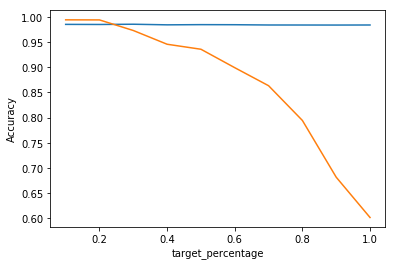

In [510]:
sns.lineplot(x="target_percentage", y="Accuracy", data=eval_DTC)
sns.lineplot(x="target_percentage", y="Accuracy", data=eval_logreg)

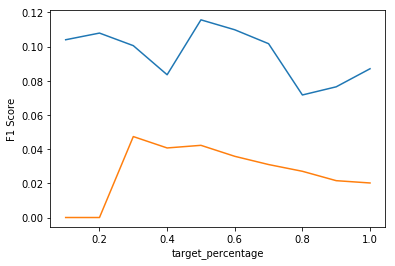

In [511]:
sns.lineplot(x="target_percentage", y="F1 Score", data=eval_DTC)
sns.lineplot(x="target_percentage", y="F1 Score", data=eval_logreg)

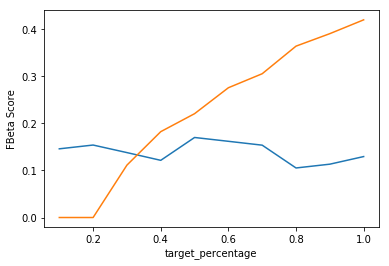

In [512]:
sns.lineplot(x="target_percentage", y="FBeta Score", data=eval_DTC)
sns.lineplot(x="target_percentage", y="FBeta Score", data=eval_logreg)

# Exercise 15.6 (3 points)

Compare and comment about the results

### DecisionTreeClassifier ADASYN

In [467]:
#Train DecisionTreeClassifier
regTreeADASYN = DecisionTreeClassifier()
regTreeADASYN.fit(X_ada, y_ada)
Y_pred = regTreeADASYN.predict(X_validation)
eval_models =[]

eval_models.append(["DecisionTreeClassifier",
             "ADASYN",       
             len(y_ada),
             target_percentage,
             accuracy_score(Y_validation, Y_pred), 
             f1_score(Y_validation, Y_pred), 
             fbeta_score(Y_validation, Y_pred, beta=10)])

### LogisticRegression ADASYN

In [468]:
#Train DecisionTreeClassifier and metrics
logregADASYN = LogisticRegression(solver='liblinear')

logregADASYN.fit(X_ada, y_ada)
Y_pred = logregADASYN.predict(X_validation)

eval_models.append(["LogisticRegression",
             "ADASYN",
             len(y_ada),
             target_percentage,
             accuracy_score(Y_validation, Y_pred), 
             f1_score(Y_validation, Y_pred), 
             fbeta_score(Y_validation, Y_pred, beta=10)])

eval_models = pd.DataFrame(eval_models, columns=['model','Balanced by','number_records','target_percentage', 'Accuracy', 'F1 Score', 'FBeta Score'])
eval_models

,model,Balanced by,number_records,target_percentage,Accuracy,F1 Score,FBeta Score
0,DecisionTreeClassifier,ADASYN,192927,0.8,0.983516,0.080429,0.121195
1,LogisticRegression,ADASYN,192927,0.8,0.572506,0.019077,0.412177


Se observa que el arbol de decisión se ve poco afectado por el over sampling dado que sus medidas de error se mantienen casi constantes con un maximo en el 50%, por el contrario la regresión logística tiene una alta variación en el accuracy y el FBeta Score, con un F1 Score que se estabiliza desde el 50%, aunque conserva una pequeña caida despues del 50%.

Por lo cual el balance para cada uno de los modelos debería ser:

- DecisionTreeClassifier: 50%
- LogisticRegression: 50%